<a href="https://colab.research.google.com/github/Oughty-Otieno/Time-Series-Analysis-and-Forecasting-Project/blob/main/Time_Series_Analysis_and_Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more
drivers during peak hours, we need to predict the number of taxi orders for the next hour. Build a
model for such a prediction.
The RMSE metric on the test set should not be more than 48.

# Data Importation

In [1]:
import pandas as pd
import numpy as np



In [2]:
data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)

data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


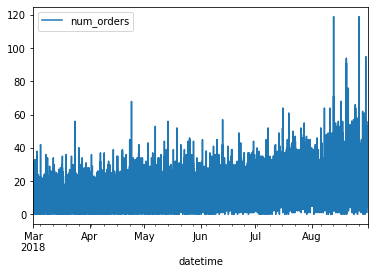

In [3]:
data.plot();

# Resample the data


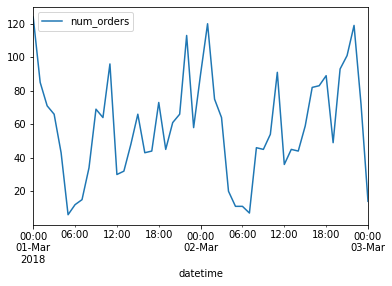

In [4]:

re=data['2018-03-01 00:00:00' : '2018-03-03 00:00:00'].resample('1H').sum()
re.plot()

In [9]:
re_data = data.resample('1H').sum()

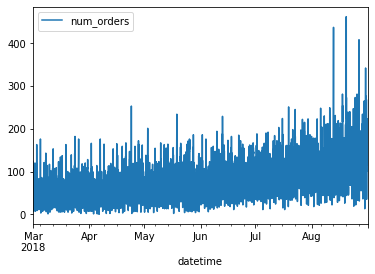

In [10]:
re_data.plot()

# Create Features

In [6]:
def make_features(data, rolling_mean_size):
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['rolling_mean'] = (
        data['num_orders'].shift().rolling(rolling_mean_size).mean()
    )



make_features(re_data, 2)
print(re_data.head(10))

                     num_orders  day  dayofweek  rolling_mean
datetime                                                     
2018-03-01 00:00:00         124    1          3           NaN
2018-03-01 01:00:00          85    1          3           NaN
2018-03-01 02:00:00          71    1          3         104.5
2018-03-01 03:00:00          66    1          3          78.0
2018-03-01 04:00:00          43    1          3          68.5
2018-03-01 05:00:00           6    1          3          54.5
2018-03-01 06:00:00          12    1          3          24.5
2018-03-01 07:00:00          15    1          3           9.0
2018-03-01 08:00:00          34    1          3          13.5
2018-03-01 09:00:00          69    1          3          24.5


# Clean up and splitting

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

train, test = train_test_split(re_data, shuffle=False, test_size=0.1)
train = train.dropna()

print(train.shape)
print(test.shape)

(3972, 4)
(442, 4)


# Modelling and prediction

In [8]:
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

model = LinearRegression()
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(
    'MAE for the training set:', mean_absolute_error(target_train, pred_train)
)
print('MAE for the test set:', mean_absolute_error(target_test, pred_test))

MAE for the training set: 25.43051191439183
MAE for the test set: 45.05949743882254


In [11]:
from sklearn.linear_model import LogisticRegression      # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier          # Decision Tree Classifier
from sklearn.svm import SVC                              # SVM Classifier
from sklearn.naive_bayes import MultinomialNB            # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier       # KNN Classifier

# Ensemble classifiers
from sklearn.ensemble import BaggingClassifier           # Bagging Meta-Estimator Classifier
from sklearn.ensemble import RandomForestClassifier      # RandomForest Classifier 
from sklearn.ensemble import AdaBoostClassifier          # AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier  # AdaBoost GradientBoostingClassifier
import xgboost as xgb                                    # Importing the XGBoost library



In [12]:
# Instantiating our models
# ---
#
logistic_classifier = LogisticRegression(solver='saga', max_iter=800, multi_class='multinomial')
decision_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_classifier = MultinomialNB() 

bagging_meta_classifier = BaggingClassifier()
random_forest_classifier = RandomForestClassifier()
ada_boost_classifier = AdaBoostClassifier(random_state=42)
gbm_classifier = GradientBoostingClassifier(random_state=42) 
xg_boost_classifier = xgb.XGBClassifier() 

# Training our models
# ---
#  
logistic_classifier.fit(features_train, target_train)
decision_classifier.fit(features_train, target_train)
svm_classifier.fit(features_train, target_train)
knn_classifier.fit(features_train, target_train)
naive_classifier.fit(features_train, target_train) 

bagging_meta_classifier.fit(features_train, target_train)
random_forest_classifier.fit(features_train, target_train)
ada_boost_classifier.fit(features_train, target_train)
gbm_classifier.fit(features_train, target_train)
xg_boost_classifier.fit(features_train, target_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


XGBClassifier(objective='multi:softprob')

In [13]:
# Making predictions
# ---
#
logistic_y_prediction = logistic_classifier.predict(features_test) 
decision_y_prediction = decision_classifier.predict(features_test) 
svm_y_prediction = svm_classifier.predict(features_test) 
knn_y_prediction = knn_classifier.predict(features_test) 
naive_y_prediction = naive_classifier.predict(features_test)  

bagging_y_classifier = bagging_meta_classifier.predict(features_test) 
random_forest_y_classifier = random_forest_classifier.predict(features_test) 
ada_boost_y_classifier = ada_boost_classifier.predict(features_test)
gbm_y_classifier = gbm_classifier.predict(features_test)
xg_boost_y_classifier = xg_boost_classifier.predict(features_test)

In [15]:
# Evaluating the Models
# ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy scores
#
print("Logistic Regression Classifier", mean_absolute_error(logistic_y_prediction, target_test))
print("Decision Trees Classifier", mean_absolute_error(decision_y_prediction, target_test))
print("SVN Classifier", mean_absolute_error(svm_y_prediction, target_test))
print("KNN Classifier", mean_absolute_error(knn_y_prediction, target_test))
print("Naive Bayes Classifier", mean_absolute_error(naive_y_prediction, target_test))
 
print("Bagging Classifier", mean_absolute_error(bagging_y_classifier, target_test))
print("Random Forest Classifier", mean_absolute_error(random_forest_y_classifier, target_test))
print("Ada Boost Classifier", mean_absolute_error(ada_boost_y_classifier, target_test))
print("GBM Classifier", mean_absolute_error(gbm_y_classifier, target_test))
print("XGBoost Classifier", mean_absolute_error(xg_boost_y_classifier, target_test))

Logistic Regression Classifier 59.744343891402714
Decision Trees Classifier 61.71266968325792
SVN Classifier 52.21493212669683
KNN Classifier 76.93891402714932
Naive Bayes Classifier 63.914027149321264
Bagging Classifier 61.463800904977376
Random Forest Classifier 65.72624434389141
Ada Boost Classifier 53.55429864253394
GBM Classifier 63.81674208144796
XGBoost Classifier 54.047511312217196


# Recomendation

Of all the models used, only Linear regression met an MAE error below 48 as required in the problem statement. 
This was more of a continous value prediction, the other empirical classifiers have proved difficult.